In [23]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

with open("../../data_use/cluster/kmeans_results.pkl", "rb") as f:
    kmeans_results = pickle.load(f)
with open("../../data_use/cluster/gmm_results.pkl", "rb") as f:
    gmm_results = pickle.load(f)

X_train_pca = np.load("../../data_use/pca/X_train_pca.npy")
y_train = np.load("../../data_use/tf_idf/y_train.npy", allow_pickle=True)

# Build unique labels as strings to avoid mixed-type indexing later
unique_labels = np.unique(np.asarray(y_train).astype(str))

colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
label_to_color = dict(zip(unique_labels, colors))




Biểu đồ so sánh chỉ số

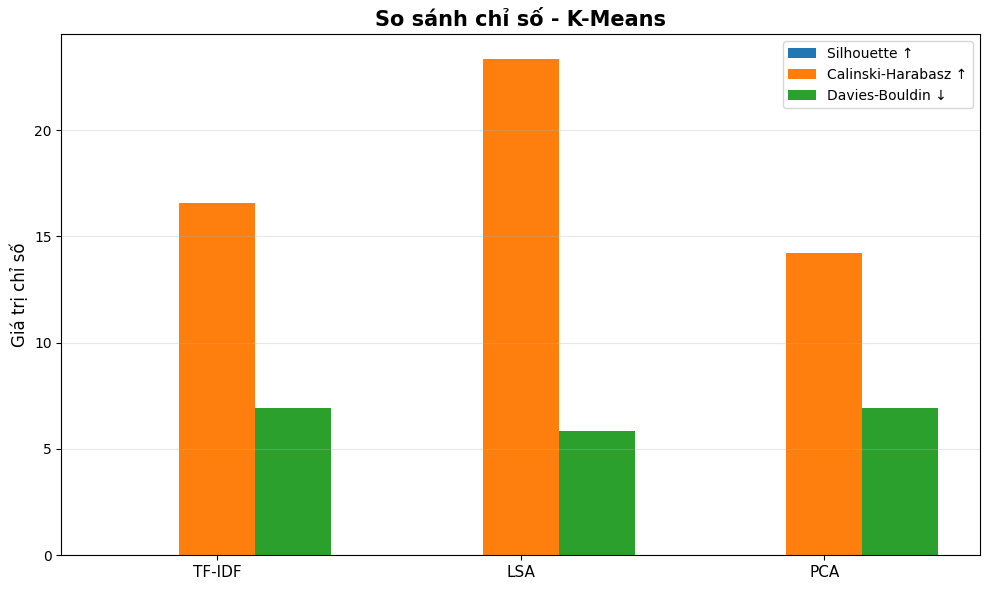

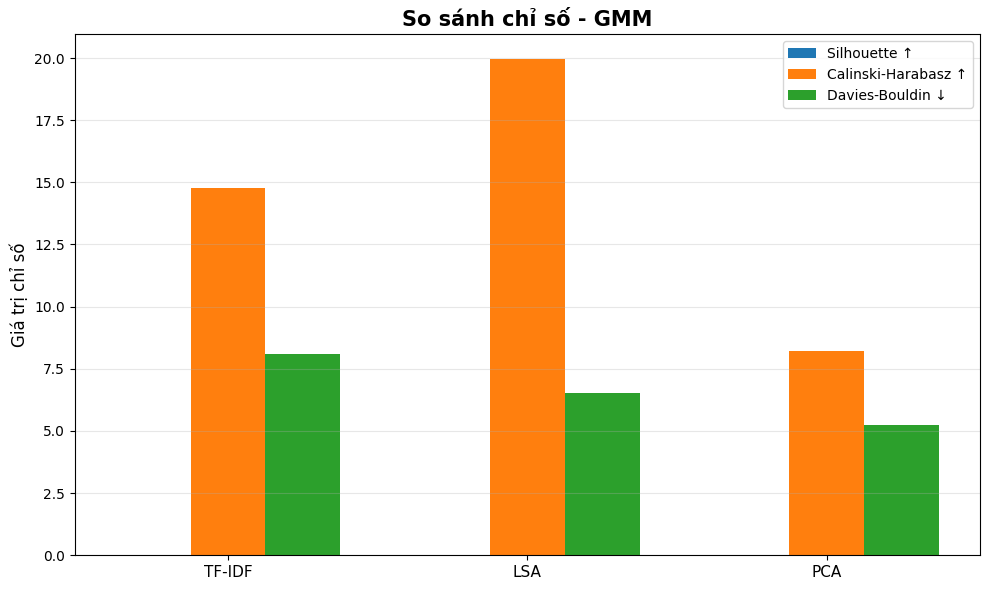

In [24]:
def plot_metrics(results, title, save_path, show_plot=True):
    metrics = ["silhouette", "davies_bouldin", "calinski_harabasz"]
    datasets = list(results.keys())
    values = {m: [results[d][m] for d in datasets] for m in metrics}

    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    x = np.arange(len(datasets))

    plt.bar(x - bar_width, values["silhouette"], width=bar_width, label="Silhouette ↑")
    plt.bar(x, values["calinski_harabasz"], width=bar_width, label="Calinski-Harabasz ↑")
    plt.bar(x + bar_width, values["davies_bouldin"], width=bar_width, label="Davies-Bouldin ↓")

    plt.xticks(x, datasets, fontsize=11)
    plt.title(title, fontsize=15, fontweight="bold")
    plt.ylabel("Giá trị chỉ số", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3, axis="y")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")

    if show_plot:
        plt.show()
    plt.close()

plot_metrics(kmeans_results, "So sánh chỉ số - K-Means", "img/kmeans_metrics.png", show_plot=True)
plot_metrics(gmm_results, "So sánh chỉ số - GMM", "img/gmm_metrics.png", show_plot=True)

Scatter Plot 2D từng cụm


Plotting K-Means - TF-IDF...


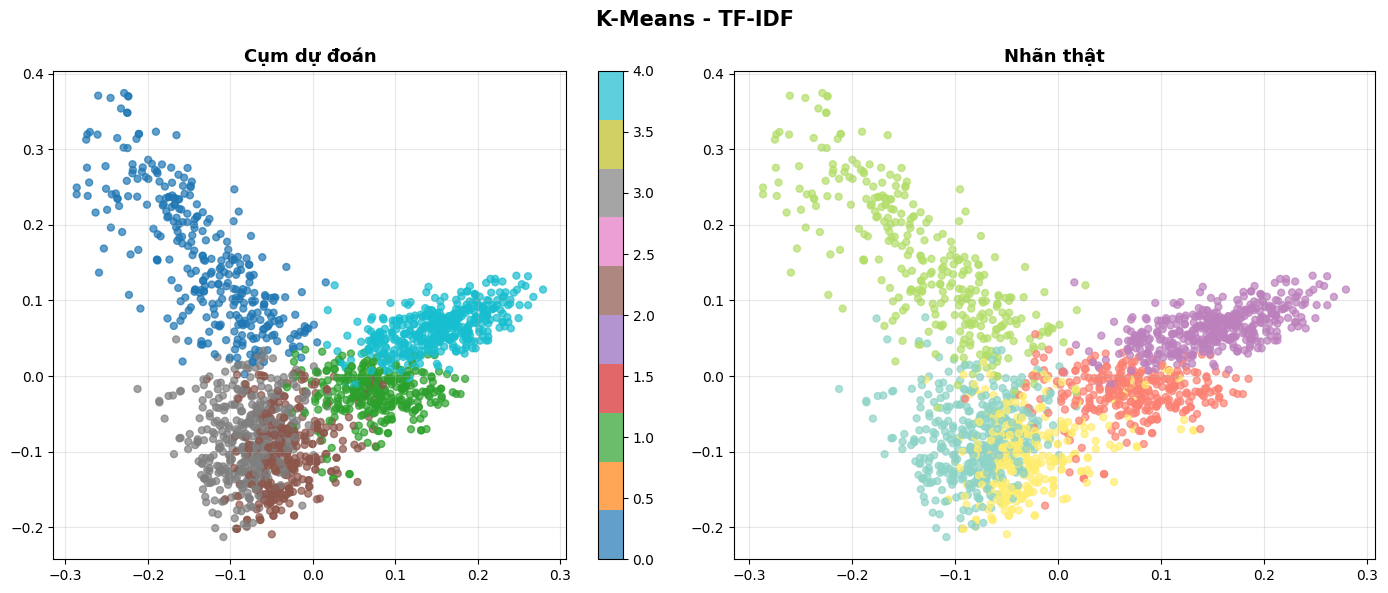

Đã vẽ: img/k-means_tf-idf_clusters.png

Plotting K-Means - LSA...


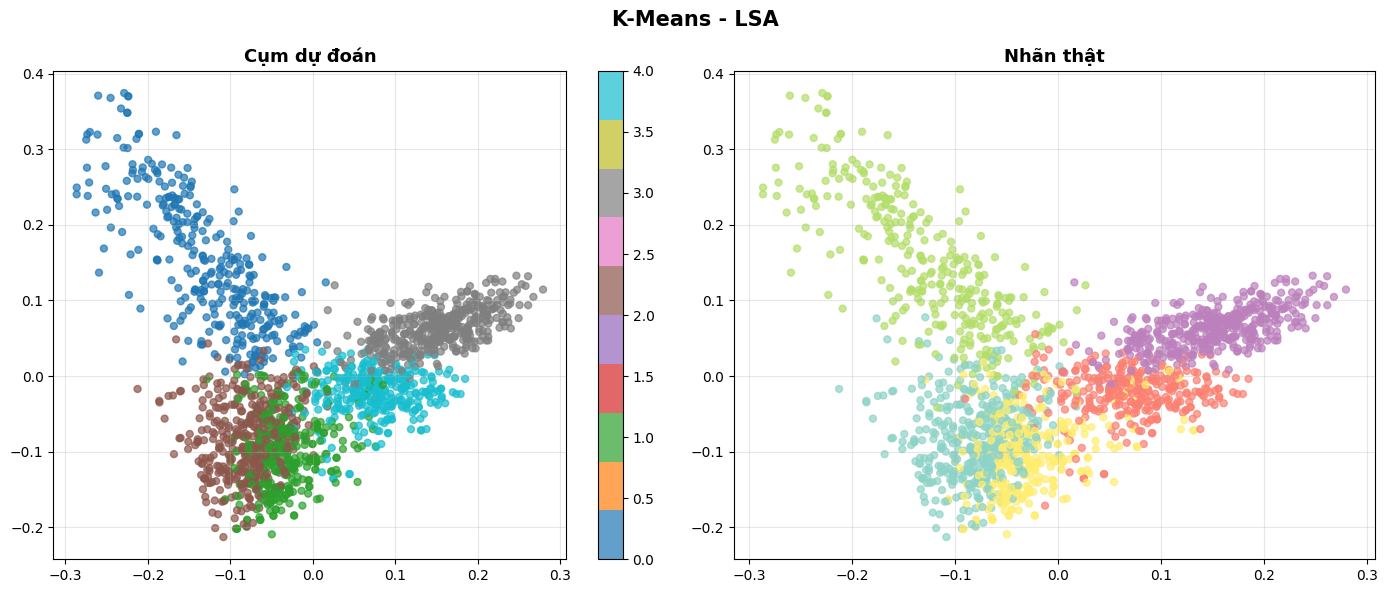

Đã vẽ: img/k-means_lsa_clusters.png

Plotting K-Means - PCA...


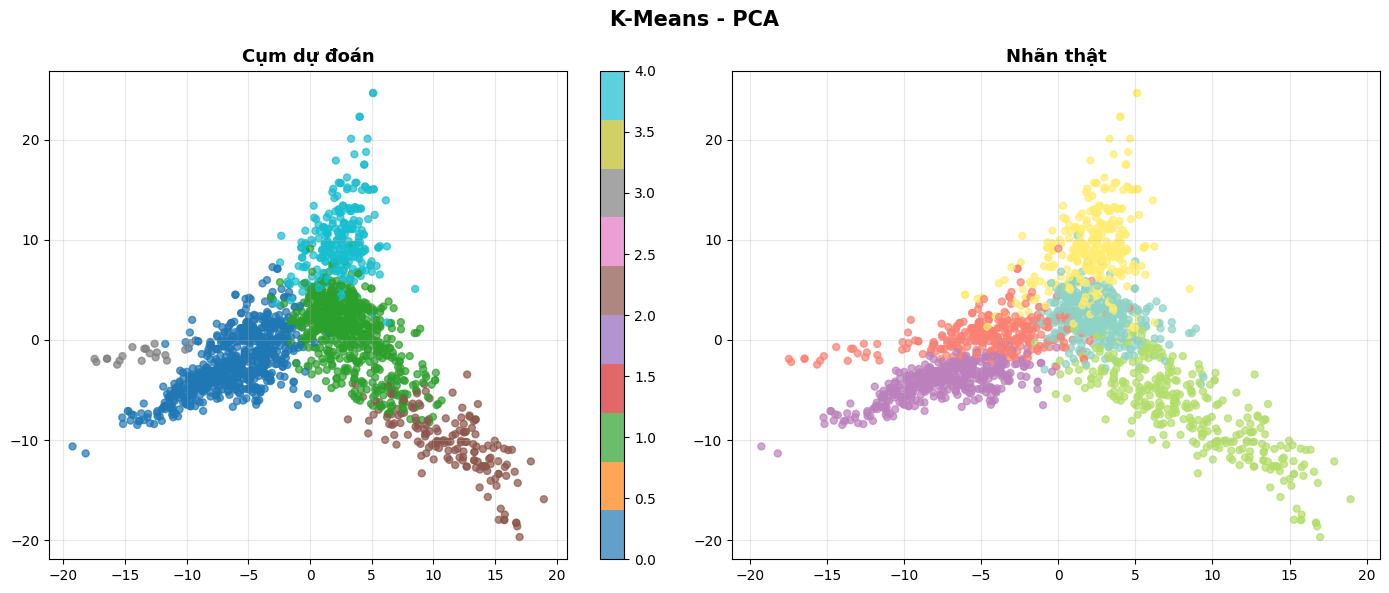

Đã vẽ: img/k-means_pca_clusters.png

Plotting GMM - TF-IDF...


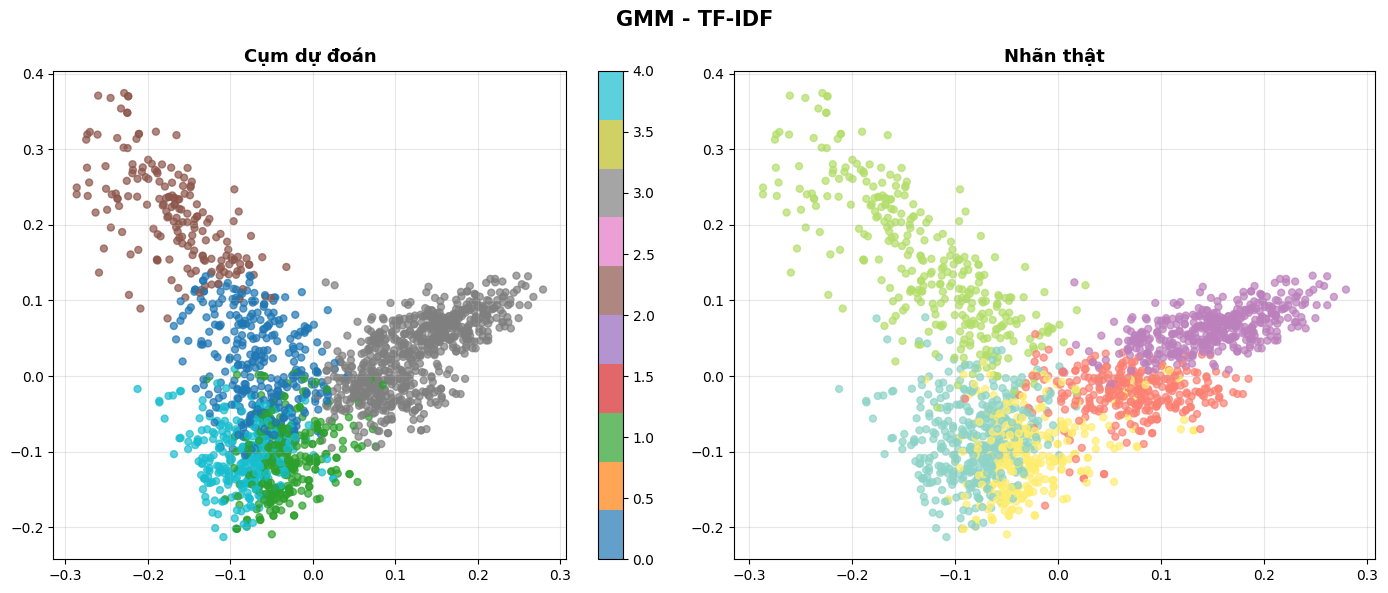

Đã vẽ: img/gmm_tf-idf_clusters.png

Plotting GMM - LSA...


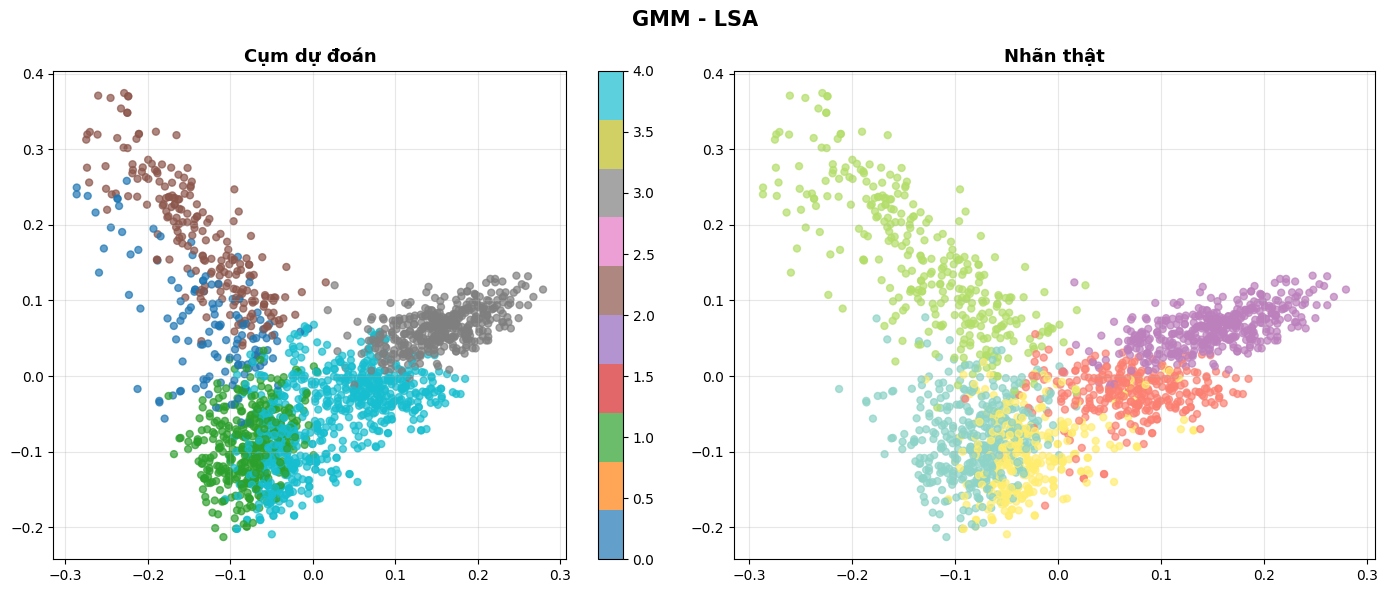

Đã vẽ: img/gmm_lsa_clusters.png

Plotting GMM - PCA...


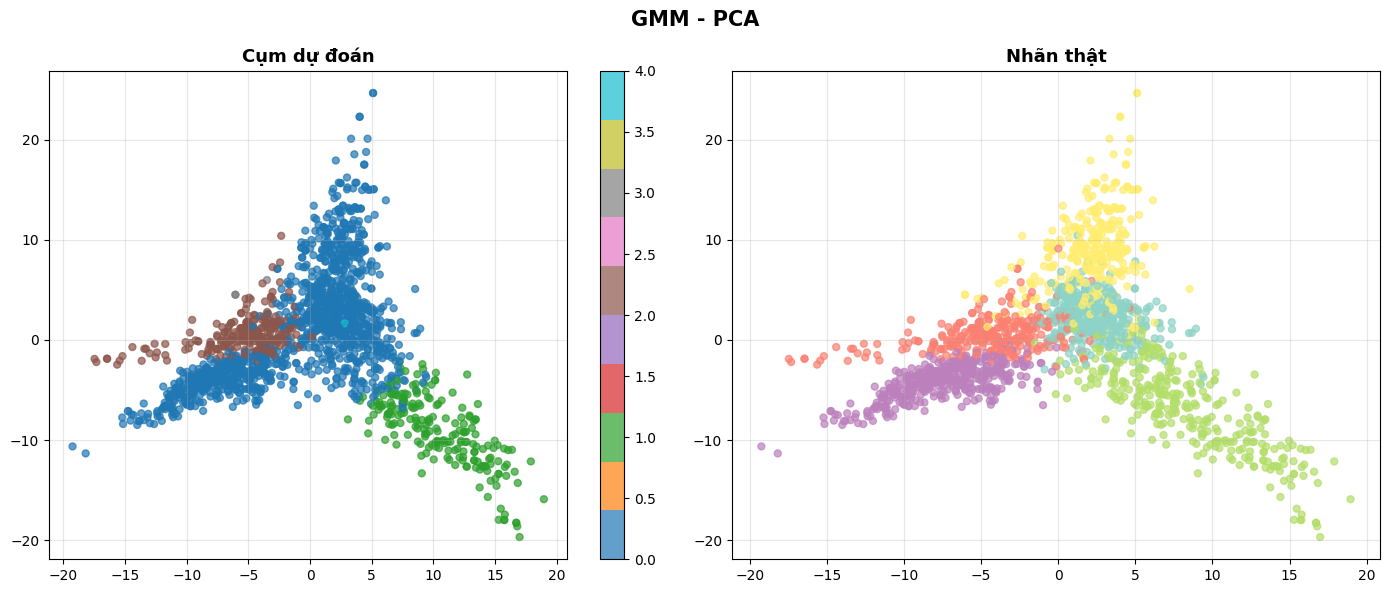

Đã vẽ: img/gmm_pca_clusters.png


In [25]:
from IPython.display import display

def plot_scatter_clusters(X, y_pred, y_true, title, save_path, show_plot=True):
    pca_2d = PCA(n_components=2, random_state=42)
    X_2d = pca_2d.fit_transform(X)

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Trái: cụm dự đoán
    scatter1 = ax[0].scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, cmap='tab10', alpha=0.7, s=25)
    ax[0].set_title("Cụm dự đoán", fontsize=13, fontweight="bold")
    ax[0].grid(alpha=0.3)
    fig.colorbar(scatter1, ax=ax[0])

    # Phải: nhãn thật
    # Ensure y_true are strings to match label_to_color keys
    y_true_str = [str(label) for label in y_true]
    scatter2 = ax[1].scatter(X_2d[:, 0], X_2d[:, 1],
                             c=[label_to_color[str(label)] for label in y_true_str],
                             alpha=0.7, s=25)
    ax[1].set_title("Nhãn thật", fontsize=13, fontweight="bold")
    ax[1].grid(alpha=0.3)

    plt.suptitle(title, fontsize=15, fontweight="bold")
    plt.tight_layout()
    fig.savefig(save_path, dpi=300, bbox_inches="tight")

    if show_plot:
        try:
            # Force display in notebook
            display(fig)
        except Exception:
            plt.show()
    plt.close(fig)

# Vẽ cho cả K-Means & GMM (LSA & PCA)
def visualize_models(results, model_name):
    for feature, info in results.items():
        print(f"\nPlotting {model_name} - {feature}...")
        y_pred = info["labels"]
        if feature == "TF-IDF":
            X = np.load("../../data_use/lsa/X_train_lsa.npy")  
        elif feature == "LSA":
            X = np.load("../../data_use/lsa/X_train_lsa.npy")
        else:
            X = np.load("../../data_use/pca/X_train_pca.npy")
        path = f"img/{model_name.lower()}_{feature.lower()}_clusters.png"
        plot_scatter_clusters(X, y_pred, y_train, f"{model_name} - {feature}", path, show_plot=True)
        print(f"Đã vẽ: {path}")

# Call visualize for both models
visualize_models(kmeans_results, "K-Means")
visualize_models(gmm_results, "GMM")

heat map confusion matrix


True labels (rows): ['business', 'entertainment', 'politics', 'sport', 'tech']
Pred labels (cols): ['0', '1', '2', '3', '4']

Confusion crosstab (rows=true, cols=pred):

Pred             0    1    2   3    4
True                                 
business         0  405    1   0    2
entertainment  240   47    0  19    0
politics         2  169  160   0    0
sport          407    2    0   0    0
tech            21   39    0   0  260

Crosstab shape: (5, 5)


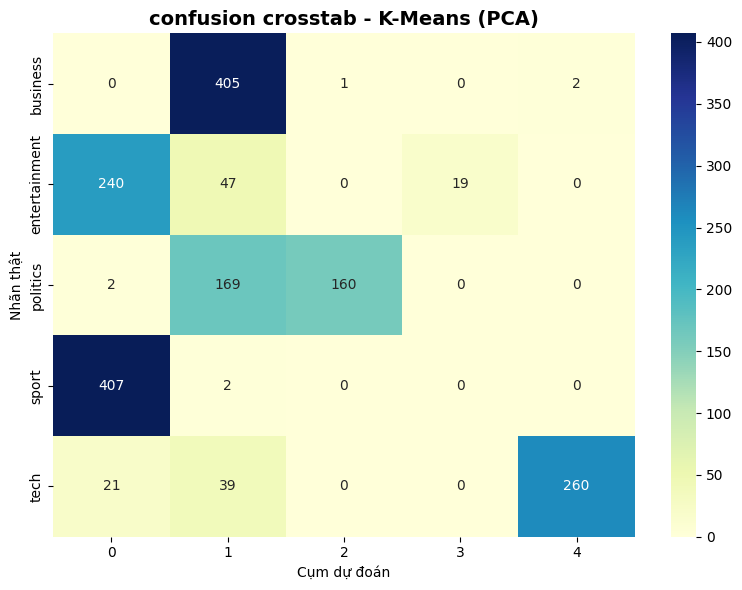


True labels (rows): ['business', 'entertainment', 'politics', 'sport', 'tech']
Pred labels (cols): ['0', '1', '2', '3', '4']

Confusion crosstab (rows=true, cols=pred):

Pred             0    1    2  3  4
True                              
business       405    1    0  0  2
entertainment   65    0  241  0  0
politics       125  206    0  0  0
sport          408    0    1  0  0
tech           310    0    7  3  0

Crosstab shape: (5, 5)


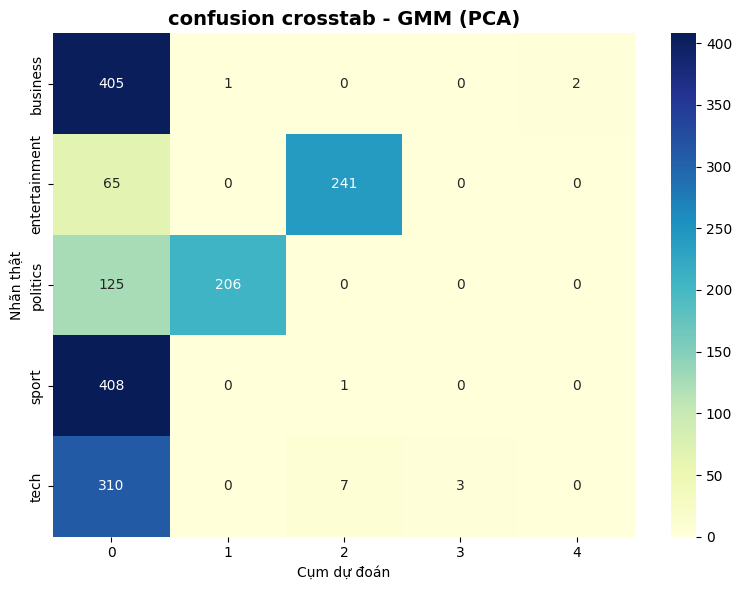

In [26]:
def plot_confusion_heatmap(y_true, y_pred, title, save_path, show_plot=True, print_matrix=True):
    import pandas as pd

    # Normalize types to strings
    y_true_arr = np.asarray(y_true).astype(str)
    y_pred_arr = np.asarray(y_pred).astype(str)

    # Build crosstab (rows=true, cols=pred)
    ct = pd.crosstab(pd.Series(y_true_arr, name='True'), pd.Series(y_pred_arr, name='Pred'))

    if print_matrix:
        print("\nTrue labels (rows):", list(ct.index))
        print("Pred labels (cols):", list(ct.columns))
        print("\nConfusion crosstab (rows=true, cols=pred):\n")
        print(ct)
        print(f"\nCrosstab shape: {ct.shape}")

    # Plot heatmap (rectangular supported)
    plt.figure(figsize=(max(8, 0.6 * ct.shape[1]), max(6, 0.4 * ct.shape[0])))
    sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Cụm dự đoán")
    plt.ylabel("Nhãn thật")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")

    if show_plot:
        plt.show()
    plt.close()

# Vẽ heatmap cho K-Means (PCA)
km_pca_pred = kmeans_results["PCA"]["labels"]
plot_confusion_heatmap(y_train, km_pca_pred,
                       "confusion crosstab - K-Means (PCA)",
                       "img/confusion_kmeans_pca.png", show_plot=True, print_matrix=True)

# Vẽ heatmap cho GMM (PCA)
gmm_pca_pred = gmm_results["PCA"]["labels"]
plot_confusion_heatmap(y_train, gmm_pca_pred,
                       "confusion crosstab - GMM (PCA)",
                       "img/confusion_gmm_pca.png", show_plot=True, print_matrix=True)